In [10]:
import pandas as pd
#df = pd.read_csv("downloads/sales.csv")
df = pd.read_csv(r"C:\Users\Super\Downloads\sales.csv")
df


,Date,Sales
0,2024-01-01,104
1,2024-01-02,107
2,2024-01-03,116
3,2024-01-04,118
4,2024-01-05,96
...,...,...
175,2024-06-24,185
176,2024-06-25,187
177,2024-06-26,200
178,2024-06-27,182


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [14]:
# 1. Create outputs folder
os.makedirs("outputs", exist_ok=True)
# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"])
# Sort by date
df = df.sort_values("Date")
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [15]:
print(df.head())

        Date  Sales
0 2024-01-01    104
1 2024-01-02    107
2 2024-01-03    116
3 2024-01-04    118
4 2024-01-05     96


In [17]:
 #3 Basic Info
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    180 non-null    datetime64[ns]
 1   Sales   180 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.9 KB
None

Missing Values:
Date     0
Sales    0
dtype: int64


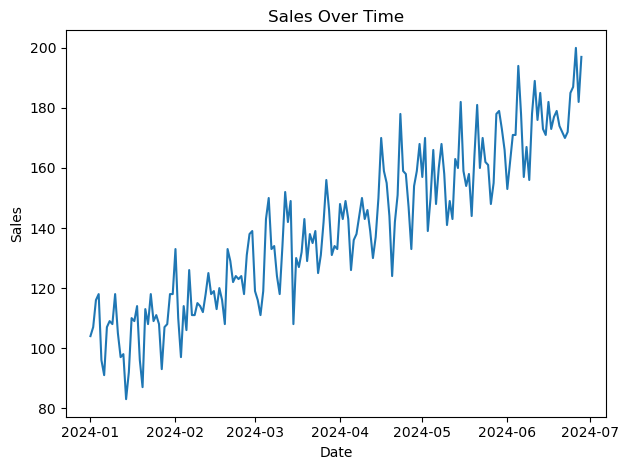

Saved: outputs/sales_over_time.png


In [20]:
 # 4.Plot Sales Over Time
plt.figure()
plt.plot(df["Date"], df["Sales"])
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.savefig("outputs/sales_over_time.png")
plt.show()
plt.close()
print("Saved: outputs/sales_over_time.png")

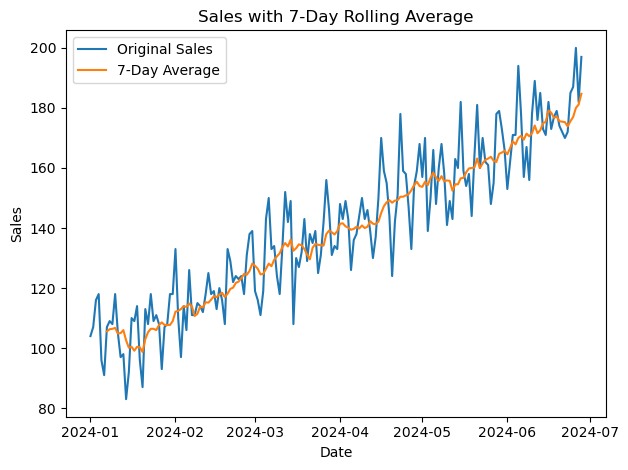

Saved: outputs/rolling_average.png


In [21]:
# 5. Rolling Average (7 days)
df["Rolling7"] = df["Sales"].rolling(window=7).mean()

plt.figure()
plt.plot(df["Date"], df["Sales"], label="Original Sales")
plt.plot(df["Date"], df["Rolling7"], label="7-Day Average")
plt.legend()
plt.title("Sales with 7-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.savefig("outputs/rolling_average.png")
plt.show()
plt.close()

print("Saved: outputs/rolling_average.png")

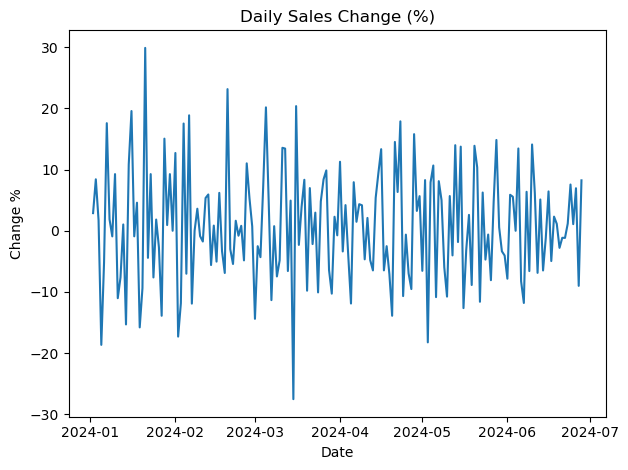

Saved: outputs/daily_change.png


In [23]:
# 6. Daily Percentage Change
df["Daily Change %"] = df["Sales"].pct_change() * 100

plt.figure()
plt.plot(df["Date"], df["Daily Change %"])
plt.title("Daily Sales Change (%)")
plt.xlabel("Date")
plt.ylabel("Change %")
plt.tight_layout()
plt.savefig("outputs/daily_change.png")
plt.show()
plt.close()

print("Saved: outputs/daily_change.png")

In [29]:
# 7. Prepare Data for ML
df["Day"] = np.arange(len(df))

X = df[["Date"]]
y = df["Sales"]

In [30]:
# 8. Train Model
model = LinearRegression()
model.fit(X, y)

print("\nModel Trained Successfully!")


Model Trained Successfully!


In [31]:
# 9. Predict Future 30 Days
future_days = 30
last_day = df["Day"].iloc[-1]

future_X = np.array([[last_day + i] for i in range(1, future_days + 1)])
future_predictions = model.predict(future_X)

# Create future dates
last_date = df["Date"].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

future_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted Sales": future_predictions
})

print("\nNext 5 Days Prediction:")
print(future_df.head())


Next 5 Days Prediction:
        Date  Predicted Sales
0 2024-06-29     -9039.867406
1 2024-06-30     -9039.867406
2 2024-07-01     -9039.867406
3 2024-07-02     -9039.867406
4 2024-07-03     -9039.867406


C:\Users\Super\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


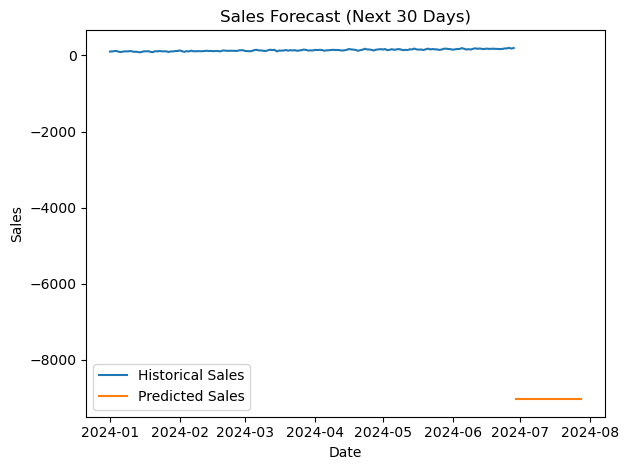

Saved: outputs/sales_prediction.png


In [33]:
# 10. Plot Prediction
plt.figure()
plt.plot(df["Date"], df["Sales"], label="Historical Sales")
plt.plot(future_df["Date"], future_df["Predicted Sales"], label="Predicted Sales")
plt.legend()
plt.title("Sales Forecast (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.savefig("outputs/sales_prediction.png")
plt.show()

print("Saved: outputs/sales_prediction.png")

In [34]:
# 11. Save Prediction CSV
future_df.to_csv("outputs/future_predictions.csv", index=False)
print("Saved: outputs/future_predictions.csv")

print("\nProject Completed Successfully!")

Saved: outputs/future_predictions.csv

Project Completed Successfully!
